<a href="https://colab.research.google.com/github/annanya-mathur/Cardiovascular-Disease-Detection/blob/main/Predicting_Causes_for_CardioVasular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **ATTRIBUTE INFO-** 

---


     
1.  age 
2.  sex       
3. chest pain type  (4 values)       
4. resting blood pressure  
5. serum cholestoral in mg/dl      
6. fasting blood sugar > 120 mg/dl       
7. resting electrocardiographic results  (values 0,1,2) 
8. maximum heart rate achieved  
9. exercise induced angina    
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment     
12. number of major vessels (0-3) colored by flourosopy        
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect   




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving cardio-statlog_csv.csv to cardio-statlog_csv.csv


In [4]:
dataframe=pd.read_csv('cardio-statlog_csv.csv')
dataframe.head(10)

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,cardio,diabetes
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1,1


In [5]:
dataframe.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
cardio                                  0
diabetes                                0
dtype: int64

In [6]:
dataframe.isnull().values.any()

False

In [7]:
dataframe.shape

(270, 15)

**Generating basic statistics**

---


As standard deviation
, Mean 
, Count
, MAX value
, MIN value


In [8]:
dataframe.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,cardio,diabetes
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444,0.414815
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827,0.493605
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000,1.000000


In [9]:
dataframe['cardio'].value_counts()

0    150
1    120
Name: cardio, dtype: int64

According to the dataset there are 120 people out of 270 having cardiovascular disease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


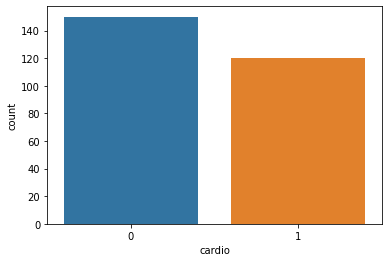

In [10]:
sb.countplot(dataframe['cardio'])

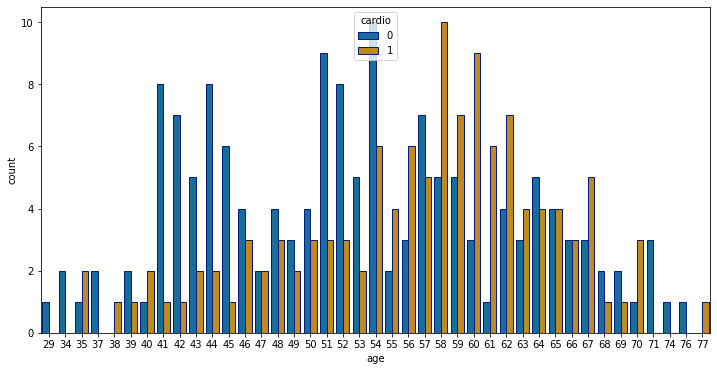

In [11]:
pt.figure(figsize=(12,6))
sb.countplot(x='age',hue='cardio',data=dataframe,palette='colorblind', edgecolor=sb.color_palette('dark',n_colors=1))

**Here, we can clearly see that increase risk to cardiovascular disease is after age of 55**


In [12]:
dataframe.corr()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,cardio,diabetes
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322,0.193028
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721,0.242716
chest,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436,0.392411
resting_blood_pressure,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383,0.134683
serum_cholestoral,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021,0.080602
fasting_blood_sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319,-0.033701
resting_electrocardiographic_results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091,0.154801
maximum_heart_rate_achieved,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514,-0.392372
exercise_induced_angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303,0.385101
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967,0.359067


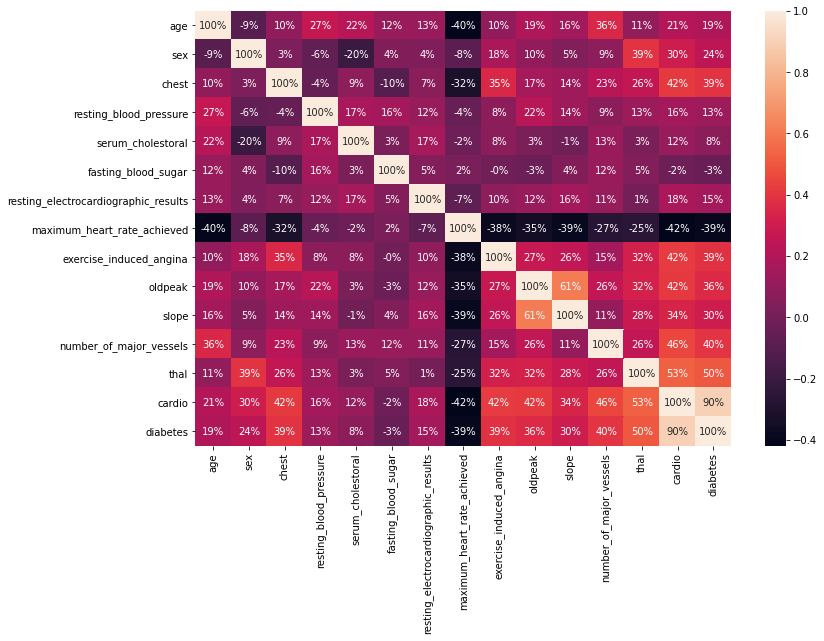

In [13]:
pt.figure(figsize=(12,8))
sb.heatmap(dataframe.corr(),annot=True,fmt='.0%')

 *Risk* *of* *having* *cardiovascular* *diseases* *is* *affected* *by* *factors* *such* *as* ** **Diabetes** (90%) , **Thallium** **Stress** (53%) , **Chest** **Pain** (42%), 
**Sex** (30%) (since men are more prone to such diseases,However women mainly have it after menopause), 
**Age** (21%) (as we have seen after 55 yrs of age people are more prone).
**Cholestoral** (12%)